In [2]:
import torch
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import cv2
from PIL import Image

import os
import glob


In [22]:

originalfolder = "/home/ad/stanford"
destinationfolder = "/home/ad/stanford/"

# convert video to image
def video2image(ori,des):
    vidcap = cv2.VideoCapture(ori)
    success,image = vidcap.read()
    count = 0
    success = True
    while success:
        success,image = vidcap.read()
        print ('Read a new frame: ', success, 'count:', count)
        print(des)
        print(des + "%d.png" % count)
        cv2.imwrite(destinationfolder + "%d.png" % count, image)     # save frame as PNG file
        count += 1

# create the destination folder if not exist
if not os.path.exists(destinationfolder):
    os.makedirs(destinationfolder)



In [4]:
import pandas as pd
df = pd.read_csv('/home/ad/stanford/annotations.txt', delimiter = " ")

In [ ]:
    1   Track ID. All rows with the same ID belong to the same path.
    2   xmin. The top left x-coordinate of the bounding box.
    3   ymin. The top left y-coordinate of the bounding box.
    4   xmax. The bottom right x-coordinate of the bounding box.
    5   ymax. The bottom right y-coordinate of the bounding box.
    6   frame. The frame that this annotation represents.
    7   lost. If 1, the annotation is outside of the view screen.
    8   occluded. If 1, the annotation is occluded.
    9   generated. If 1, the annotation was automatically interpolated.
    10  label. The label for this annotation, enclosed in quotation marks.

In [6]:
df.columns = ['track_id', 'xmin','ymin','xmax','ymax','frame','lost','occluded','generated','label']

In [7]:
objects0 = df.loc[df['frame'] == 1]

In [106]:
from pascal_voc_writer import Writer
    

In [ ]:
for i in objects0.to_dict(orient='records'):
    if i['lost'] or i['occluded'] or i['generated']:
        continue
    cv2.rectangle(img,(i['xmin'],i['ymin']),(i['xmax'],i['ymax']),color,thickness)

In [124]:
df['frame'] = df['frame']+1

In [ ]:
df

In [22]:
objects0

,track_id,xmin,ymin,xmax,ymax,frame,lost,occluded,generated,label
25800,25,671,1011,718,1067,1,1,0,1,Biker
26832,26,444,1000,477,1072,1,1,0,1,Pedestrian
32428,29,1382,159,1408,211,1,0,0,1,Pedestrian
33992,31,1036,838,1088,894,1,0,0,1,Pedestrian
35556,33,878,1011,920,1058,1,1,0,1,Biker
36588,34,975,1020,1040,1065,1,1,0,1,Biker
38152,36,402,1007,426,1070,1,1,0,1,Pedestrian
63952,61,659,343,705,395,1,0,0,1,Pedestrian
139998,130,337,775,402,842,1,0,0,1,Biker
140530,131,367,197,420,251,1,0,0,1,Biker


In [62]:
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2

In [3]:
img_path = '/mnt/r4/aliev/stanford_voc/JPEGImages/bookstore_video1_4.jpg'
img = cv2.imread(img_path)

In [122]:
im = Image.open(img_path)
writer = Writer(img_path, im.size[0],im.size[1])
for i in objects0.to_dict(orient='records'):
    if i['lost'] or i['occluded'] or i['generated']:
        continue

    writer.addObject(i['label'], i['xmin'],i['ymin'], i['xmax'],i['ymax'])
writer.save('/home/ad/stanford/0.png')  

In [1]:
color_dict = {"Pedestrian":(255,0,0),
              "Biker":(0,255,0)
             }

In [20]:
for i in objects0.to_dict(orient='records'):
    if i['lost'] or i['occluded'] or i['generated']:
        continue
    cv2.rectangle(img,(i['xmin'],i['ymin']),(i['xmax'],i['ymax']),color_dict['label'],thickness)


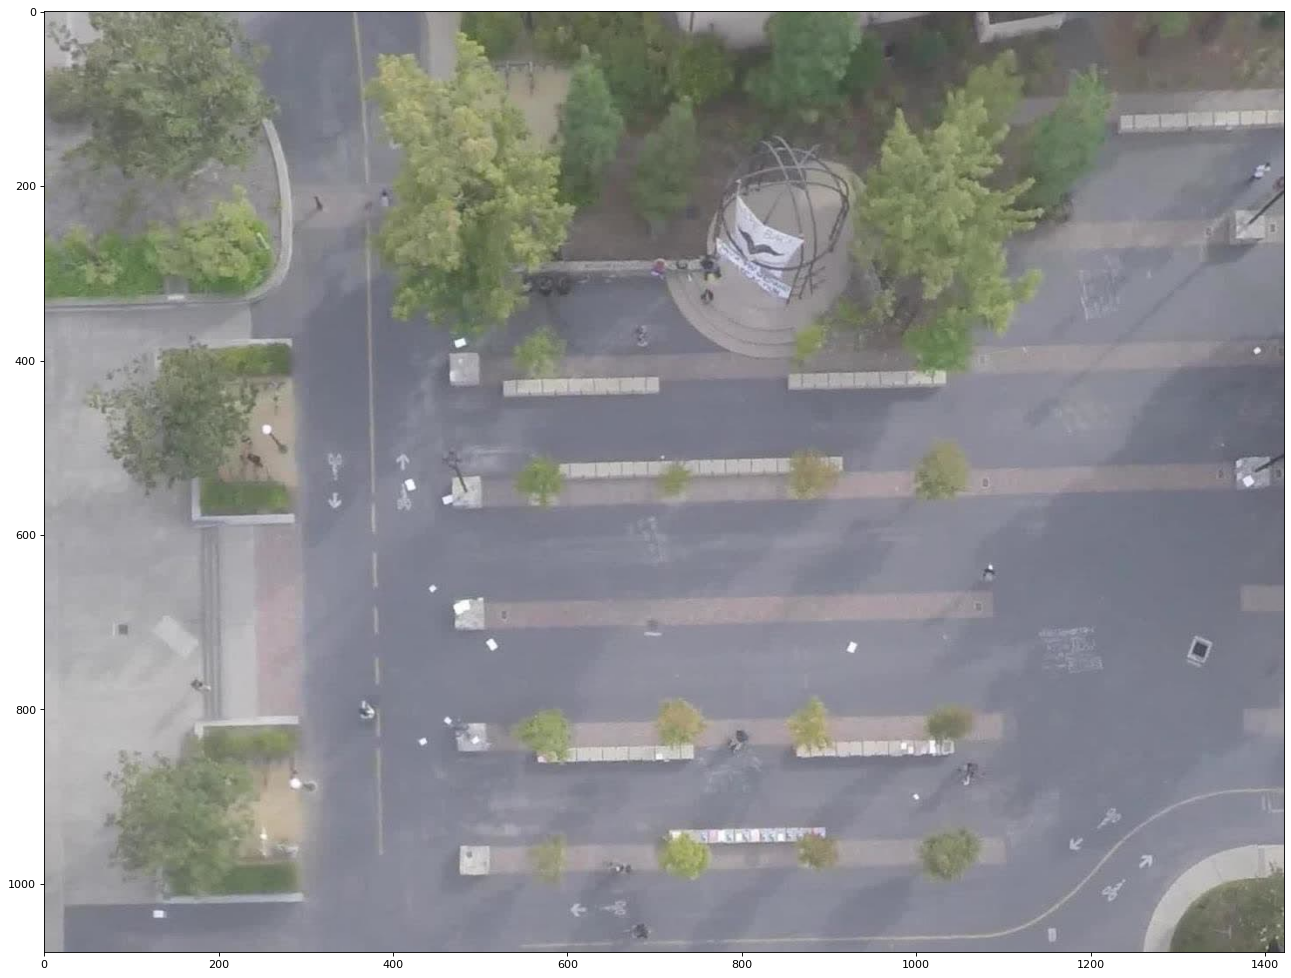

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im_pil = Image.fromarray(img)
figure(figsize=(20, 16), dpi=80)
plt.imshow(im_pil)